## 1. Import Libraries

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import random

## 2. Load Data

In [2]:
df = pd.read_excel(r'DataScientistTask_Dataset.xlsx')

## 3. Understanding the data

- Size and shape of data

In [3]:
# Size of the data
rows, cols = df.shape
print(f"We have {rows} rows and {cols} columns in our dataset.")

We have 9206 rows and 15 columns in our dataset.


- describtion of the data 

In [4]:
df.describe()  

,WellID,BVHH,NioGOR,CodGOR,LateralLength,ProppantPerFoot,FluidPerFoot,LeftDistance,RightDistance,TVD,NormalizedOilEUR,NormalizedGasEUR
count,9.206000e+03,7565.000000,8709.000000,7538.000000,9206.000000,8974.000000,8942.000000,6758.000000,6778.000000,8893.000000,9206.000000,9206.000000
mean,7.183554e+08,1.031013,4699.704950,4219.441933,6970.061820,1013.557032,1035.336411,864.819473,877.969608,7013.938041,19.033831,105.802192
std,9.295257e+08,0.370794,12584.166286,3306.948828,2673.528748,529.759630,629.271011,925.304147,947.646937,616.775613,8.187220,66.225371
min,5.001097e+08,-0.125405,85.752059,336.475960,1749.000000,0.000000,0.001171,14.000000,14.000000,2610.000000,0.000000,0.000000
25%,5.123379e+08,0.750481,2189.721498,2314.007323,4349.250000,725.260473,703.318099,343.000000,344.000000,6680.000000,13.646120,51.336490
50%,5.123416e+08,1.020468,3448.129246,3406.380480,6668.500000,923.412724,862.066743,590.000000,591.000000,7061.000000,17.722519,97.304146
75%,5.123458e+08,1.310162,4900.703302,5001.128167,9596.000000,1153.233929,1207.024954,901.750000,903.000000,7347.000000,23.020425,151.120432
max,4.902129e+09,2.260032,357894.183679,26193.592720,16676.000000,10217.314931,20117.640692,5275.000000,5276.000000,9793.000000,96.959244,465.849396


- head of the data 

In [5]:
df.head()

,WellID,BVHH,FormationAlias,NioGOR,CodGOR,LateralLength,ProppantPerFoot,FluidPerFoot,LeftDistance,LeftNeighbourType,RightDistance,RightNeighbourType,TVD,NormalizedOilEUR,NormalizedGasEUR
0,500109742,1.105028,NIOBRARA,1687.414535,NaN,8084.0,1256.308758,1234.370856,NaN,NoNeighbour,NaN,NoNeighbour,7501.0,15.234785,37.674048
1,500109753,0.644480,NIOBRARA,2267.667384,NaN,3912.0,742.842536,784.000000,NaN,NoNeighbour,1330.0,Codeveloped,7551.0,5.327198,11.627301
2,500109754,0.620268,NIOBRARA,2368.236087,NaN,4137.0,912.738700,1127.047136,1330.0,Codeveloped,NaN,NoNeighbour,7594.0,5.629925,14.544356
3,500109760,0.649670,NIOBRARA,333.876618,NaN,4161.0,914.683970,691.026676,NaN,NoNeighbour,NaN,NoNeighbour,7391.0,8.240087,7.012257
4,500109772,1.423475,NIOBRARA,3608.065949,3199.96293,4418.0,747.271842,928.239928,NaN,NoNeighbour,NaN,NoNeighbour,7838.0,15.374830,51.169534


- determine Categorical and Numerical column of data

In [6]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)
# checking if the column name has any extra spaces 

Numerical columns: 
 Index(['WellID', 'BVHH', 'NioGOR', 'CodGOR', 'LateralLength',
       'ProppantPerFoot', 'FluidPerFoot', 'LeftDistance', 'RightDistance',
       'TVD', 'NormalizedOilEUR', 'NormalizedGasEUR'],
      dtype='object')
Categorical columns: 
 Index(['FormationAlias', 'LeftNeighbourType', 'RightNeighbourType'], dtype='object')


- WellID in the well IDdentifier serial number which consist of state next to region number so will ignore it .

- Check Null values by feature

In [7]:
# Count of Null values by feature
df.isnull().sum()

WellID                   0
BVHH                  1641
FormationAlias           0
NioGOR                 497
CodGOR                1668
LateralLength            0
ProppantPerFoot        232
FluidPerFoot           264
LeftDistance          2448
LeftNeighbourType        0
RightDistance         2428
RightNeighbourType       0
TVD                    313
NormalizedOilEUR         0
NormalizedGasEUR         0
dtype: int64

In [8]:
df.loc[:,"LeftDistance"].isnull().sum()*100/len(df)

26.591353465131437

It seems that we have **2428** missing values in the `LeftDistance` column. As this is **26.6%** of the data we have, we can`t drop it now as it has a impact.

- Duplicate records:

In [9]:
dup = df.duplicated().sum()
print(f"We have {dup} values.")

We have 0 values.


- Data Types:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9206 entries, 0 to 9205
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WellID              9206 non-null   int64  
 1   BVHH                7565 non-null   float64
 2   FormationAlias      9206 non-null   object 
 3   NioGOR              8709 non-null   float64
 4   CodGOR              7538 non-null   float64
 5   LateralLength       9206 non-null   float64
 6   ProppantPerFoot     8974 non-null   float64
 7   FluidPerFoot        8942 non-null   float64
 8   LeftDistance        6758 non-null   float64
 9   LeftNeighbourType   9206 non-null   object 
 10  RightDistance       6778 non-null   float64
 11  RightNeighbourType  9206 non-null   object 
 12  TVD                 8893 non-null   float64
 13  NormalizedOilEUR    9206 non-null   float64
 14  NormalizedGasEUR    9206 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.1+ 

It seems that we need to change the data types for:
- `FormationAlias` from *object* to *0/1* as int value represent the class.
- `LeftNeighbourType` from *object* to *0/1/2* as int value represent the class.
- `RightNeighbourType` from *object* to *0/1/2* as int value represent the class.

## 4. Data Pre-processing

In [11]:
print(df.isna().sum())

WellID                   0
BVHH                  1641
FormationAlias           0
NioGOR                 497
CodGOR                1668
LateralLength            0
ProppantPerFoot        232
FluidPerFoot           264
LeftDistance          2448
LeftNeighbourType        0
RightDistance         2428
RightNeighbourType       0
TVD                    313
NormalizedOilEUR         0
NormalizedGasEUR         0
dtype: int64


- first BVHH can now fill null values with mean as aproxamation value but in real case i suggest to take mean of neighbour well rock quality .

In [12]:
df['BVHH'].fillna(int(df['BVHH'].mean()), inplace=True)

- as I search and understand for NioGOR and CodGOR features it represent the layer of earth so it can may be not found to we can not fill null values with mean I preffer the replace with 0 .

In [13]:
df['NioGOR'].fillna(0, inplace=True)

In [14]:
df['CodGOR'].fillna(0, inplace=True)

- ProppantPerFoot and FluidPerFoot can fill null values with mean .

In [15]:
df['ProppantPerFoot'].fillna(int(df['ProppantPerFoot'].mean()), inplace=True)

In [16]:
df['FluidPerFoot'].fillna(int(df['FluidPerFoot'].mean()), inplace=True)

- LeftDistance and RightDistance can not fill null values with mean the right way to represent distance with zero when NoNeighbour one otherwise.

In [17]:
 df['LeftDistance'] = df.apply(
            lambda row: 0 if row['LeftNeighbourType'] == 'NoNeighbour' else 1,
            axis=1
        )

In [18]:
 df['RightDistance'] = df.apply(
            lambda row: 0 if row['RightNeighbourType'] == 'NoNeighbour' else 1,
            axis=1
        )

In [19]:
df.loc[:,"TVD"].isnull().sum()*100/len(df)

3.3999565500760376

It seems that we have **313** missing values in the `number_of_impressions` column. As this is **3.4%** of the data we have, we can drop it now as it has a very small impact.

In [20]:
df = df.dropna(how='any',axis=0) 

In [21]:
print(df.isna().sum())
print(df.shape)

WellID                0
BVHH                  0
FormationAlias        0
NioGOR                0
CodGOR                0
LateralLength         0
ProppantPerFoot       0
FluidPerFoot          0
LeftDistance          0
LeftNeighbourType     0
RightDistance         0
RightNeighbourType    0
TVD                   0
NormalizedOilEUR      0
NormalizedGasEUR      0
dtype: int64
(8893, 15)


- handle Categorical columns

In [22]:
df["FormationAlias"].unique()

array(['NIOBRARA', 'CODELL'], dtype=object)

In [23]:
df["LeftNeighbourType"].unique()

array(['NoNeighbour', 'Codeveloped', 'Parent'], dtype=object)

In [24]:
df["RightNeighbourType"].unique()

array(['NoNeighbour', 'Codeveloped', 'Parent'], dtype=object)

In [25]:
# Import label encoder 
# label_encoder object knows how to understand word labels. 
FormationAlias_label_encoder = preprocessing.LabelEncoder() 
NeighbourType_label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'FormationAlias , LeftNeighbourType , RightNeighbourType'. 
df['FormationAlias']= FormationAlias_label_encoder.fit_transform(df['FormationAlias'])
df['LeftNeighbourType']= NeighbourType_label_encoder.fit_transform(df['LeftNeighbourType'])
df['RightNeighbourType']= NeighbourType_label_encoder.fit_transform(df['RightNeighbourType'])
  
df.head()

,WellID,BVHH,FormationAlias,NioGOR,CodGOR,LateralLength,ProppantPerFoot,FluidPerFoot,LeftDistance,LeftNeighbourType,RightDistance,RightNeighbourType,TVD,NormalizedOilEUR,NormalizedGasEUR
0,500109742,1.105028,1,1687.414535,0.00000,8084.0,1256.308758,1234.370856,0,1,0,1,7501.0,15.234785,37.674048
1,500109753,0.644480,1,2267.667384,0.00000,3912.0,742.842536,784.000000,0,1,1,0,7551.0,5.327198,11.627301
2,500109754,0.620268,1,2368.236087,0.00000,4137.0,912.738700,1127.047136,1,0,0,1,7594.0,5.629925,14.544356
3,500109760,0.649670,1,333.876618,0.00000,4161.0,914.683970,691.026676,0,1,0,1,7391.0,8.240087,7.012257
4,500109772,1.423475,1,3608.065949,3199.96293,4418.0,747.271842,928.239928,0,1,0,1,7838.0,15.374830,51.169534


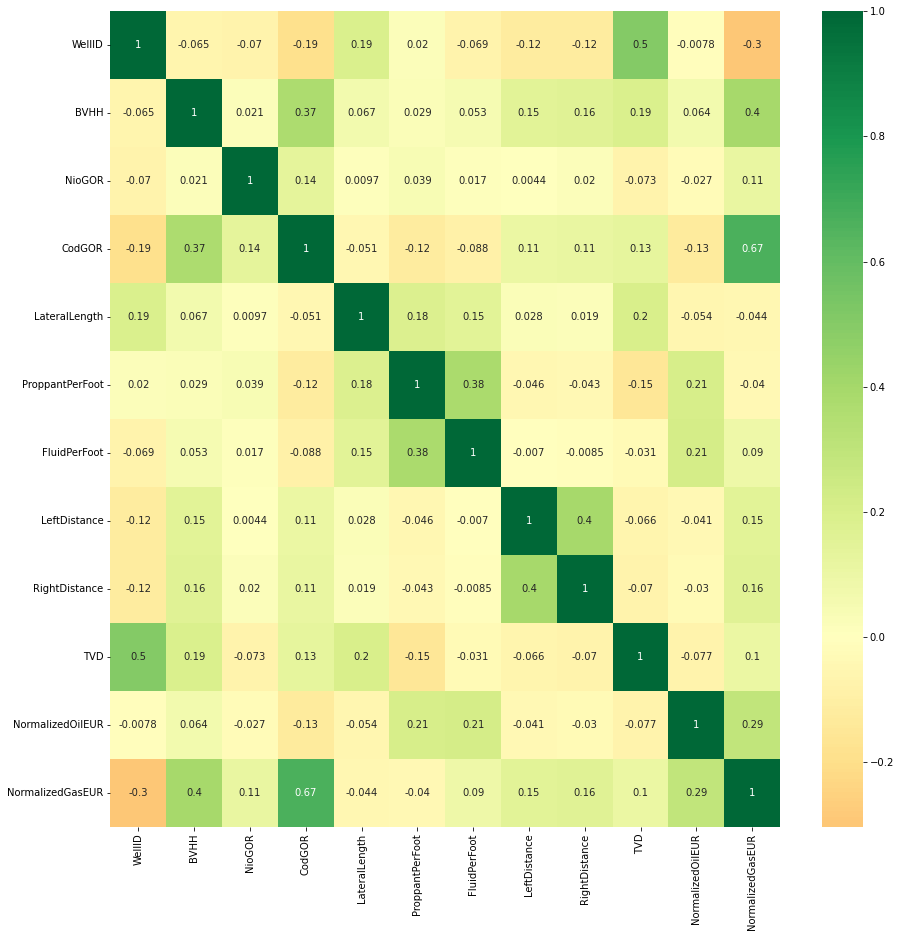

In [26]:
# Let's check the multicollinearity of features by checking the correlation matric
plt.figure(figsize=(15,15))
p=sns.heatmap(df[num_col].corr(), annot=True,cmap='RdYlGn',center=0) 

## 6. Model Building

In [27]:
# Train test split
X=df.drop(columns=['WellID','NormalizedOilEUR','NormalizedGasEUR'])
y_O=df[['NormalizedOilEUR']]
y_G=df[['NormalizedGasEUR']]

X_train_O,X_test_O,y_train_O,y_test_O = train_test_split(X,y_O,test_size=0.3,random_state=1234)
X_train_G,X_test_G,y_train_G,y_test_G = train_test_split(X,y_G,test_size=0.3,random_state=1234)

## Approach 1 : Adding 1 varaible after 1

###  NormalizedOilEUR

### Building model with 1 variable

In [28]:
# Select only one feature in regression model
X_train1 = X_train_O['FluidPerFoot']

In [29]:
# Add a constant
X_train1 = sm.add_constant(X_train1)

# Create a first ols model
model_1 = sm.OLS(y_train_O, X_train1).fit()

In [30]:
# Check parameters created
model_1.params

const           16.505378
FluidPerFoot     0.002568
dtype: float64

In [31]:
# Summary of the model
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedOilEUR   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     242.2
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           1.34e-53
Time:                        23:06:05   Log-Likelihood:                -21837.
No. Observations:                6225   AIC:                         4.368e+04
Df Residuals:                    6223   BIC:                         4.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           16.5054      0.197     83.894   

R-squared is very less for the model, so there's a need to add more features as R-square itself is not able to explain the expenses

### Building model with 2 variable

In [32]:
# Add one more feature in regression model
X_train2 = X_train_O[['BVHH','FluidPerFoot']]

In [33]:
# Add a constant
X_train2 = sm.add_constant(X_train2)

# Create second ols model
model_2 = sm.OLS(y_train_O, X_train2).fit()

In [34]:
# Check parameters created
model_2.params

const           15.543268
BVHH             0.962058
FluidPerFoot     0.002544
dtype: float64

In [35]:
# Summary of the model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedOilEUR   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     126.3
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           1.64e-54
Time:                        23:06:05   Log-Likelihood:                -21832.
No. Observations:                6225   AIC:                         4.367e+04
Df Residuals:                    6222   BIC:                         4.369e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.5433      0.360     43.151   

R-squared and Adj. R squared has increased for the model, but we can still improvise over it so let's add more features

### Building model with 3 variable

In [36]:
# Adding one more feature in regression model
X_train3 = X_train_O[['BVHH','FluidPerFoot', 'TVD']]

In [37]:
# Add a constant
X_train3 = sm.add_constant(X_train3)

# Create third fitted model
model_3 = sm.OLS(y_train_O, X_train3).fit()

In [38]:
# Check parameters created
model_3.params

const           23.671145
BVHH             1.398144
FluidPerFoot     0.002497
TVD             -0.001216
dtype: float64

In [39]:
# Summary of the model
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedOilEUR   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     102.5
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           9.46e-65
Time:                        23:06:05   Log-Likelihood:                -21806.
No. Observations:                6225   AIC:                         4.362e+04
Df Residuals:                    6221   BIC:                         4.365e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.6711      1.176     20.125   

### Building model with 4 variable

In [40]:
# Adding one more feature in regression model
X_train4 = X_train_O[['BVHH','FluidPerFoot', 'TVD','LateralLength']]


In [41]:
# Add a constant
X_train4 = sm.add_constant(X_train4)


In [42]:
# Create third fitted model
model_4 = sm.OLS(y_train_O, X_train4).fit()


In [43]:
# Check parameters created
model_4.params


const            23.694375
BVHH              1.423445
FluidPerFoot      0.002658
TVD              -0.001017
LateralLength    -0.000233
dtype: float64

In [44]:
# Summary of the model
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedOilEUR   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     85.78
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           4.85e-71
Time:                        23:06:05   Log-Likelihood:                -21789.
No. Observations:                6225   AIC:                         4.359e+04
Df Residuals:                    6220   BIC:                         4.362e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            23.6944      1.173     20.199

### Building model with 5 variable

In [45]:
# Adding one more feature in regression model
X_train5 = X_train_O[['BVHH','FluidPerFoot', 'TVD','LateralLength','NioGOR']]

In [46]:
# Add a constant
X_train5 = sm.add_constant(X_train5)

In [47]:
# Create third fitted model
model_5 = sm.OLS(y_train_O, X_train5).fit()

In [48]:
# Check parameters created
model_5.params

const            24.123221
BVHH              1.471925
FluidPerFoot      0.002660
TVD              -0.001066
LateralLength    -0.000232
NioGOR           -0.000032
dtype: float64

In [49]:
# Summary of the model
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedOilEUR   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     71.38
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           7.23e-73
Time:                        23:06:05   Log-Likelihood:                -21782.
No. Observations:                6225   AIC:                         4.358e+04
Df Residuals:                    6219   BIC:                         4.362e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            24.1232      1.178     20.480

### Building model with 6 variable

In [50]:
# Adding one more feature in regression model
X_train6 = X_train_O[['BVHH','FluidPerFoot', 'TVD','LateralLength','NioGOR','CodGOR']]

In [51]:
# Add a constant
X_train6 = sm.add_constant(X_train6)

In [52]:
# Create third fitted model
model_6 = sm.OLS(y_train_O, X_train6).fit()

In [53]:
# Check parameters created
model_6.params

const            23.203607
BVHH              2.905386
FluidPerFoot      0.002473
TVD              -0.000888
LateralLength    -0.000274
NioGOR           -0.000014
CodGOR           -0.000389
dtype: float64

In [54]:
# Summary of the model
print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedOilEUR   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     85.23
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          5.45e-103
Time:                        23:06:05   Log-Likelihood:                -21710.
No. Observations:                6225   AIC:                         4.343e+04
Df Residuals:                    6218   BIC:                         4.348e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            23.2036      1.167     19.885

- we add one feature by one to get better model score with no collinearity between x features and more impact with y feature .
- so after adding the six x feature we get multicollinearity with greater R-squared but we can allow multicollinearity . 

### NormalizedGasEUR

### Building model with 1 variable

In [55]:
# Select only one feature in regression model
X_train1 = X_train_G['CodGOR']

In [56]:
# Add a constant
X_train1 = sm.add_constant(X_train1)

# Create a first ols model
model_1 = sm.OLS(y_train_G, X_train1).fit()

In [57]:
# Check parameters created
model_1.params

const     60.514244
CodGOR     0.012883
dtype: float64

In [58]:
# Summary of the model
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedGasEUR   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     4988.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:06:05   Log-Likelihood:                -33142.
No. Observations:                6225   AIC:                         6.629e+04
Df Residuals:                    6223   BIC:                         6.630e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.5142      0.908     66.645      0.0

R-squared is very less for the model, so there's a need to add more features as R-square itself is not able to explain the expenses

### Building model with 2 variable

In [59]:
# Add one more feature in regression model
X_train2 = X_train_G[['BVHH','CodGOR']]

In [60]:
# Add a constant
X_train2 = sm.add_constant(X_train2)

# Create second ols model
model_2 = sm.OLS(y_train_G, X_train2).fit()

In [61]:
# Check parameters created
model_2.params

const     31.621191
BVHH      32.356511
CodGOR     0.011692
dtype: float64

In [62]:
# Summary of the model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedGasEUR   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     2740.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:06:06   Log-Likelihood:                -33008.
No. Observations:                6225   AIC:                         6.602e+04
Df Residuals:                    6222   BIC:                         6.604e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6212      1.961     16.124      0.0

R-squared and Adj. R squared has increased for the model, but we can still improvise over it so let's add more features

### Building model with 3 variable

In [63]:
# Adding one more feature in regression model
X_train3 = X_train_G[['BVHH','CodGOR', 'RightDistance']]

In [64]:
# Add a constant
X_train3 = sm.add_constant(X_train3)

# Create third fitted model
model_3 = sm.OLS(y_train_G, X_train3).fit()

In [65]:
# Check parameters created
model_3.params

const            25.526044
BVHH             30.434331
CodGOR            0.011603
RightDistance    11.040680
dtype: float64

In [66]:
# Summary of the model
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedGasEUR   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     1862.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:06:06   Log-Likelihood:                -32979.
No. Observations:                6225   AIC:                         6.597e+04
Df Residuals:                    6221   BIC:                         6.599e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            25.5260      2.112     12.089

### Building model with 4 variable

In [67]:
# Adding one more feature in regression model
X_train4 = X_train_G[['BVHH','CodGOR', 'RightDistance','NioGOR']]

In [68]:
# Add a constant
X_train4 = sm.add_constant(X_train4)

In [69]:
# Create third fitted model
model_4 = sm.OLS(y_train_G, X_train4).fit()

In [70]:
# Check parameters created
model_4.params

const            24.851888
BVHH             30.649603
CodGOR            0.011499
RightDistance    11.024859
NioGOR            0.000185
dtype: float64

In [71]:
# Summary of the model
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedGasEUR   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     1402.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:06:06   Log-Likelihood:                -32974.
No. Observations:                6225   AIC:                         6.596e+04
Df Residuals:                    6220   BIC:                         6.599e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            24.8519      2.119     11.728

### Building model with 5 variable

In [72]:
# Adding one more feature in regression model
X_train5 = X_train_G[['BVHH','CodGOR', 'RightDistance','NioGOR', 'TVD']]

In [73]:
# Add a constant
X_train5 = sm.add_constant(X_train5)

In [74]:
# Create third fitted model
model_5 = sm.OLS(y_train_G, X_train5).fit()

In [75]:
# Check parameters created
model_5.params

const            21.896784
BVHH             30.503843
CodGOR            0.011492
RightDistance    11.092960
NioGOR            0.000187
TVD               0.000437
dtype: float64

In [76]:
# Summary of the model
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedGasEUR   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     1121.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:06:06   Log-Likelihood:                -32974.
No. Observations:                6225   AIC:                         6.596e+04
Df Residuals:                    6219   BIC:                         6.600e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.8968      7.203      3.040

### Building model with 6 variable

In [77]:
# Adding one more feature in regression model
X_train6 = X_train_G[['BVHH','CodGOR', 'RightDistance','NioGOR','LateralLength']]

In [78]:
# Add a constant
X_train6 = sm.add_constant(X_train6)

In [79]:
# Create third fitted model
model_6 = sm.OLS(y_train_G, X_train6).fit()

In [80]:
# Check parameters created
model_6.params

const            28.353203
BVHH             31.050180
CodGOR            0.011459
RightDistance    11.083100
NioGOR            0.000186
LateralLength    -0.000553
dtype: float64

In [81]:
# Summary of the model
print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedGasEUR   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     1123.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:06:06   Log-Likelihood:                -32971.
No. Observations:                6225   AIC:                         6.595e+04
Df Residuals:                    6219   BIC:                         6.599e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            28.3532      2.585     10.967

- we add one feature by one to get better model score with no collinearity between x features and more impact with y feature .
- so after adding the five x feature we get multicollinearity with greater R-squared but we can allow multicollinearity . 

## Approach 2 : RFE and eleminating by using p-value and VIF

###  NormalizedOilEUR

In [82]:
# Running RFE with important column count to be 15
lm = LinearRegression()
lm.fit(X_train_O, y_train_O)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train_O, y_train_O)

C:\Users\decim\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [83]:
list(zip(X_train_O.columns,rfe.support_,rfe.ranking_))

[('BVHH', True, 1),
 ('FormationAlias', True, 1),
 ('NioGOR', True, 1),
 ('CodGOR', True, 1),
 ('LateralLength', True, 1),
 ('ProppantPerFoot', True, 1),
 ('FluidPerFoot', True, 1),
 ('LeftDistance', True, 1),
 ('LeftNeighbourType', True, 1),
 ('RightDistance', True, 1),
 ('RightNeighbourType', True, 1),
 ('TVD', True, 1)]

In [84]:
# Selecting the important features (in the support)
imp_columns = X_train_O.columns[rfe.support_]
imp_columns

Index(['BVHH', 'FormationAlias', 'NioGOR', 'CodGOR', 'LateralLength',
       'ProppantPerFoot', 'FluidPerFoot', 'LeftDistance', 'LeftNeighbourType',
       'RightDistance', 'RightNeighbourType', 'TVD'],
      dtype='object')

In [85]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train_O[imp_columns]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value.
Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.
- High p-value High VIF : Drop the variable
- High p-value Low VIF  : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [86]:
random.seed(0)

# Add a constant
X_train_rfec = sm.add_constant(X_train_rfe)

# Build the model with RFE features
lm_rfe = sm.OLS(y_train_O,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedOilEUR   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     60.38
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          4.76e-139
Time:                        23:06:06   Log-Likelihood:                -21613.
No. Observations:                6225   AIC:                         4.325e+04
Df Residuals:                    6212   BIC:                         4.334e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 27.3840      1

Since the p value for few of the features is not siginificant, we need to drop it but before that let's check the VIF score as well

In [87]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,TVD,27.05
0,BVHH,13.96
4,LateralLength,8.73
7,LeftDistance,6.50
9,RightDistance,6.45
5,ProppantPerFoot,5.79
6,FluidPerFoot,4.38
1,FormationAlias,4.30
3,CodGOR,2.59
8,LeftNeighbourType,1.93


Since the variable **LeftNeighbourType** is having a very high p value , we would remove the feature from training dataset

In [88]:
# Dropping insignificant variables

X_train_rfe1 = X_train_rfe.drop(['LeftNeighbourType'], 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train_O, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedOilEUR   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     65.87
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          5.94e-140
Time:                        23:06:06   Log-Likelihood:                -21613.
No. Observations:                6225   AIC:                         4.325e+04
Df Residuals:                    6213   BIC:                         4.333e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 27.3370      1

C:\Users\decim\AppData\Local\Temp\ipykernel_6740\3594145589.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_rfe1 = X_train_rfe.drop(['LeftNeighbourType'], 1,)


In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,TVD,24.11
0,BVHH,13.93
4,LateralLength,8.73
8,RightDistance,6.43
5,ProppantPerFoot,5.78
7,LeftDistance,5.00
6,FluidPerFoot,4.38
1,FormationAlias,4.29
3,CodGOR,2.58
9,RightNeighbourType,1.91


Since the variable `TVD` is having a very high VIF score, we would remove the feature from training dataset

In [90]:
# Dropping insignificant variables

X_train_rfe2 = X_train_rfe1.drop('TVD', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train_O, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedOilEUR   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     66.02
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          1.91e-128
Time:                        23:06:07   Log-Likelihood:                -21642.
No. Observations:                6225   AIC:                         4.331e+04
Df Residuals:                    6214   BIC:                         4.338e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 17.0711      0

C:\Users\decim\AppData\Local\Temp\ipykernel_6740\2467747257.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_rfe2 = X_train_rfe1.drop('TVD', 1,)


In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,BVHH,10.86
4,LateralLength,6.91
8,RightDistance,5.86
5,ProppantPerFoot,5.64
7,LeftDistance,4.90
6,FluidPerFoot,4.30
1,FormationAlias,4.28
3,CodGOR,2.57
9,RightNeighbourType,1.63
2,NioGOR,1.19


Since the variable `RightNeighbourType` is having a very high p value, we would remove the feature from training dataset

In [92]:
# Dropping insignificant variables

X_train_rfe3 = X_train_rfe2.drop('RightNeighbourType', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train_O, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedOilEUR   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     73.26
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          3.29e-129
Time:                        23:06:07   Log-Likelihood:                -21642.
No. Observations:                6225   AIC:                         4.330e+04
Df Residuals:                    6215   BIC:                         4.337e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              17.2617      0.467     

C:\Users\decim\AppData\Local\Temp\ipykernel_6740\406240263.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_rfe3 = X_train_rfe2.drop('RightNeighbourType', 1,)


In [93]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,BVHH,10.60
4,LateralLength,6.69
5,ProppantPerFoot,5.58
8,RightDistance,4.91
7,LeftDistance,4.86
6,FluidPerFoot,4.29
1,FormationAlias,4.27
3,CodGOR,2.56
2,NioGOR,1.19


Since the variable **BVHH** is having a very high VIF score, we would remove the feature from training dataset

In [94]:
# Dropping insignificant variables

X_train_rfe4 = X_train_rfe3.drop('BVHH', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train_O, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedOilEUR   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     70.21
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          4.88e-111
Time:                        23:06:07   Log-Likelihood:                -21687.
No. Observations:                6225   AIC:                         4.339e+04
Df Residuals:                    6216   BIC:                         4.345e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              19.1314      0.426     

C:\Users\decim\AppData\Local\Temp\ipykernel_6740\3493458513.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_rfe4 = X_train_rfe3.drop('BVHH', 1,)


In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,LateralLength,5.88
4,ProppantPerFoot,5.49
7,RightDistance,4.77
6,LeftDistance,4.75
5,FluidPerFoot,4.24
0,FormationAlias,3.81
2,CodGOR,2.07
1,NioGOR,1.19


Since the variable `RightDistance` is having a very high P-value, we would remove the feature from training dataset

In [96]:
# Dropping insignificant variables

X_train_rfe5 = X_train_rfe4.drop('RightDistance', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train_O, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:       NormalizedOilEUR   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     80.12
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          7.96e-112
Time:                        23:06:07   Log-Likelihood:                -21687.
No. Observations:                6225   AIC:                         4.339e+04
Df Residuals:                    6217   BIC:                         4.344e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              19.0423      0.415     

C:\Users\decim\AppData\Local\Temp\ipykernel_6740\2523656641.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_rfe5 = X_train_rfe4.drop('RightDistance', 1,)


,Features,VIF
3,LateralLength,5.68
4,ProppantPerFoot,5.49
5,FluidPerFoot,4.24
0,FormationAlias,3.72
6,LeftDistance,3.72
2,CodGOR,2.03
1,NioGOR,1.19


In [97]:
# Dropping insignificant variables

X_train_rfe6 = X_train_rfe5.drop('LeftDistance', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train_O, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:       NormalizedOilEUR   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     93.00
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          3.07e-112
Time:                        23:06:07   Log-Likelihood:                -21688.
No. Observations:                6225   AIC:                         4.339e+04
Df Residuals:                    6218   BIC:                         4.344e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              18.7931      0.386     

C:\Users\decim\AppData\Local\Temp\ipykernel_6740\3261374400.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_rfe6 = X_train_rfe5.drop('LeftDistance', 1,)


,Features,VIF
4,ProppantPerFoot,5.47
3,LateralLength,5.07
5,FluidPerFoot,4.22
0,FormationAlias,3.47
2,CodGOR,1.94
1,NioGOR,1.19


In [98]:
# Dropping insignificant variables

X_train_rfe7 = X_train_rfe6.drop('NioGOR', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe7c = sm.add_constant(X_train_rfe7)
lm_rfe7 = sm.OLS(y_train_O, X_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\decim\AppData\Local\Temp\ipykernel_6740\2025054853.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_rfe7 = X_train_rfe6.drop('NioGOR', 1,)


                            OLS Regression Results                            
Dep. Variable:       NormalizedOilEUR   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     111.0
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          1.20e-112
Time:                        23:06:07   Log-Likelihood:                -21690.
No. Observations:                6225   AIC:                         4.339e+04
Df Residuals:                    6219   BIC:                         4.343e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              18.7775      0.386     

,Features,VIF
3,ProppantPerFoot,5.46
2,LateralLength,5.07
4,FluidPerFoot,4.22
0,FormationAlias,3.46
1,CodGOR,1.88


- we DROP one feature by one to get better model score with no collinearity between x features and more impact with y feature .
- so we end up with model with **ProppantPerFoot , LateralLength , FluidPerFoot , FormationAlias , CodGOR** get greater R-squared score. 

### NormalizedGasEUR

In [99]:
# Running RFE with important column count to be 15
lm = LinearRegression()
lm.fit(X_train_G, y_train_G)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train_G, y_train_G)

C:\Users\decim\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [100]:
list(zip(X_train_G.columns,rfe.support_,rfe.ranking_))

[('BVHH', True, 1),
 ('FormationAlias', True, 1),
 ('NioGOR', True, 1),
 ('CodGOR', True, 1),
 ('LateralLength', True, 1),
 ('ProppantPerFoot', True, 1),
 ('FluidPerFoot', True, 1),
 ('LeftDistance', True, 1),
 ('LeftNeighbourType', True, 1),
 ('RightDistance', True, 1),
 ('RightNeighbourType', True, 1),
 ('TVD', True, 1)]

In [101]:
# Selecting the important features (in the support)
imp_columns = X_train_G.columns[rfe.support_]
imp_columns

Index(['BVHH', 'FormationAlias', 'NioGOR', 'CodGOR', 'LateralLength',
       'ProppantPerFoot', 'FluidPerFoot', 'LeftDistance', 'LeftNeighbourType',
       'RightDistance', 'RightNeighbourType', 'TVD'],
      dtype='object')

In [102]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train_G[imp_columns]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value.
Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.
- High p-value High VIF : Drop the variable
- High p-value Low VIF  : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [103]:
random.seed(0)

# Add a constant
X_train_rfec = sm.add_constant(X_train_rfe)

# Build the model with RFE features
lm_rfe = sm.OLS(y_train_G,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedGasEUR   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     510.2
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:06:07   Log-Likelihood:                -32839.
No. Observations:                6225   AIC:                         6.570e+04
Df Residuals:                    6212   BIC:                         6.579e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 32.4569      8

Since the p value for few of the features is not siginificant, we need to drop it but before that let's check the VIF score as well

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,TVD,27.05
0,BVHH,13.96
4,LateralLength,8.73
7,LeftDistance,6.50
9,RightDistance,6.45
5,ProppantPerFoot,5.79
6,FluidPerFoot,4.38
1,FormationAlias,4.30
3,CodGOR,2.59
8,LeftNeighbourType,1.93


Since the variable **ProppantPerFoot** is having a very high p value , we would remove the feature from training dataset

In [105]:
# Dropping insignificant variables

X_train_rfe1 = X_train_rfe.drop(['ProppantPerFoot'], 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train_G, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedGasEUR   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     556.7
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:06:07   Log-Likelihood:                -32839.
No. Observations:                6225   AIC:                         6.570e+04
Df Residuals:                    6213   BIC:                         6.578e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 31.6379      8

C:\Users\decim\AppData\Local\Temp\ipykernel_6740\2551230880.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_rfe1 = X_train_rfe.drop(['ProppantPerFoot'], 1,)


In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,TVD,26.56
0,BVHH,13.95
4,LateralLength,8.52
6,LeftDistance,6.50
8,RightDistance,6.45
1,FormationAlias,4.14
5,FluidPerFoot,3.86
3,CodGOR,2.57
7,LeftNeighbourType,1.93
9,RightNeighbourType,1.92


Since the variable `TVD` is having a very high VIF score, we would remove the feature from training dataset

In [107]:
# Dropping insignificant variables

X_train_rfe2 = X_train_rfe1.drop('TVD', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train_G, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedGasEUR   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     612.3
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:06:07   Log-Likelihood:                -32839.
No. Observations:                6225   AIC:                         6.570e+04
Df Residuals:                    6214   BIC:                         6.577e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 24.4150      3

C:\Users\decim\AppData\Local\Temp\ipykernel_6740\2167672852.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_rfe2 = X_train_rfe1.drop('TVD', 1,)


In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,BVHH,10.93
4,LateralLength,6.65
8,RightDistance,6.02
6,LeftDistance,6.00
1,FormationAlias,4.14
5,FluidPerFoot,3.73
3,CodGOR,2.55
7,LeftNeighbourType,1.71
9,RightNeighbourType,1.70
2,NioGOR,1.19


Since the variable `RightNeighbourType` is having a very high p value, we would remove the feature from training dataset

In [109]:
# Dropping insignificant variables

X_train_rfe3 = X_train_rfe2.drop('RightNeighbourType', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train_G, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedGasEUR   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     679.8
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:06:08   Log-Likelihood:                -32841.
No. Observations:                6225   AIC:                         6.570e+04
Df Residuals:                    6215   BIC:                         6.577e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                22.4034      3.00

C:\Users\decim\AppData\Local\Temp\ipykernel_6740\4240671281.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_rfe3 = X_train_rfe2.drop('RightNeighbourType', 1,)


In [110]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,BVHH,10.74
4,LateralLength,6.47
6,LeftDistance,5.81
8,RightDistance,4.94
1,FormationAlias,4.13
5,FluidPerFoot,3.71
3,CodGOR,2.55
7,LeftNeighbourType,1.63
2,NioGOR,1.19


Since the variable **LeftNeighbourType** is having a very high p value, we would remove the feature from training dataset

In [111]:
# Dropping insignificant variables

X_train_rfe4 = X_train_rfe3.drop('LeftNeighbourType', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train_G, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:       NormalizedGasEUR   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     763.2
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:06:08   Log-Likelihood:                -32844.
No. Observations:                6225   AIC:                         6.571e+04
Df Residuals:                    6216   BIC:                         6.577e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             19.1627      2.740      6.

C:\Users\decim\AppData\Local\Temp\ipykernel_6740\1044581968.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_rfe4 = X_train_rfe3.drop('LeftNeighbourType', 1,)


In [112]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,BVHH,10.42
4,LateralLength,6.17
7,RightDistance,4.91
6,LeftDistance,4.86
1,FormationAlias,4.12
5,FluidPerFoot,3.68
3,CodGOR,2.55
2,NioGOR,1.19


- we DROP one feature by one to get better model score with no collinearity between x features and more impact with y feature .
- so we end up with model with **BVHH , LateralLength , RightDistance , LeftDistance , FormationAlias , FluidPerFoot , CodGOR , NioGOR** get greater R-squared score. 